# Лабораторная работа№1

**Цель работы:** практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

**Данные для работы:**
1. Средствами ОС Windows записать свой речевой сигнал.
2. Фраза — *Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных
технологий и информатики.*
3. *Формат записи* — моно-сигнал, 16000 гц или 22000 гц, без сжатия (wav-формат).

**Задачи лабораторной работы:**

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на
записи своего голоса
3. Построить сонограмму по записи своего голоса.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import more_itertools as mi
from scipy.fftpack import fft
from scipy.io.wavfile import read, write
from scipy import signal
from scipy import hamming

%matplotlib inline

In [80]:
samplerate, data = read('voice.wav')
ipd.Audio('./voice.wav')

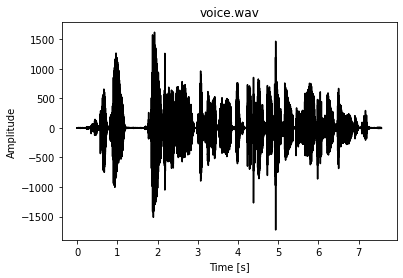

In [81]:
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])

plt.plot(time,data, color="black")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title('voice.wav')
plt.show()

**1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса:**

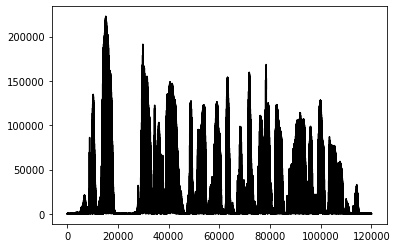

In [128]:
N = 1024
overlap = 0.5
Sr = int(samplerate/ N)
k_limit = 2

win = list(mi.windowed(data, N, int(overlap*N)))
segments = list(filter(lambda i: i != None, win))
segments = [i * np.hamming(len(i)) for i in segments]
segments = [fft(i) for i in segments]
amplitude_spector = [sum([k**2 for k in i[:int(len(i)/2)]])**0.5 for i in segments]
amplitude_spector = np.array([i.real for i in amplitude_spector])

plt.plot(amplitude_spector, color="black")
plt.show()

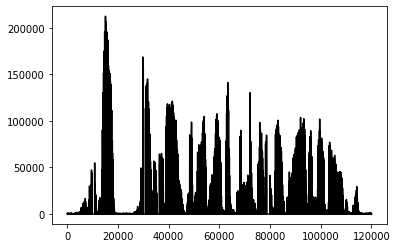

In [83]:
F0 = []

for i in [amplitude_spector[k:k + Sr] for k in range(len(amplitude_spector))[::Sr]]:
    limit = i.mean() * k_limit
    if i.max() > limit:
        F0 += i.tolist()
    else:
        F0 += np.zeros(len(i)).tolist()

plt.plot(F0, color="black")
plt.show()

**2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса:**

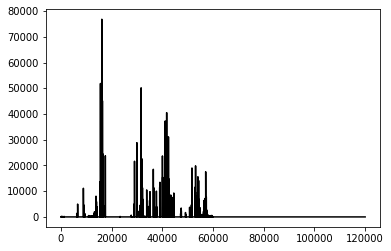

In [84]:
F1 = []

for i in range(0,len(F0)):
    if (2 * i - 1 < 0 or 2 * i + 1 >= len(F0)):
        F1 += [0]
        continue
    limit = max(F0[2*i - 1], F0[2*i], F0[2*i + 1])
    if F0[i] > k_limit * limit:
        F1 += [limit]
    else:
        F1 += [0]

plt.plot(F1, color="black")
plt.show()

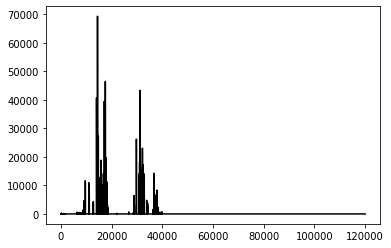

In [85]:
F2 = []

for i in range(0,len(F0)):
    if (3 * i - 1 < 0 or 3 * i + 1 >= len(F0)):
        F2 += [0]
        continue
    limit = max(F0[3*i - 1], F0[3*i], F0[3*i + 1])
    if F0[i] > k_limit * limit:
        F2 += [limit]
    else:
        F2 += [0]

plt.plot(F2, color="black")
plt.show()

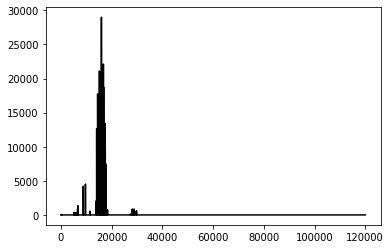

In [226]:
F3 = []

for i in range(0,len(F0)):
    if (4 * i - 1 < 0 or 4 * i + 1 >= len(F0)):
        F3 += [0]
        continue
    limit = max(F0[4*i - 1], F0[4*i], F0[4*i + 1])
    if F0[i] > k_limit * limit:
        F3 += [limit]
    else:
        F3 += [0]

plt.plot(F3, color="black")
plt.show()

**3. Построить сонограмму по записи своего голоса:**

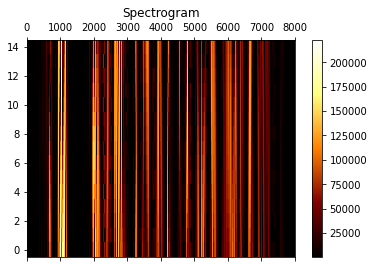

In [242]:
matrix_amp = []
for i in [amplitude_spector[k:k + Sr] for k in range(len(amplitude_spector) - 3)[::Sr]]:
    matrix_amp.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=1)
cax = ax.matshow(
    np.transpose(matrix_amp),
    interpolation="nearest",
    aspect="auto",
    cmap=plt.cm.afmhot,
    origin="lower",
)
fig.colorbar(cax)
plt.title("Spectrogram")
plt.show()

**Вывод:**

В ходе выполнения лабораторной работы были применены на практике библиотеки языка Python: matplotlib, numpy, scipy, с помощью которых обрабатывались звуковые сигналы, дискретное преобразование Фурье для анализа речевых сигналов.